In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image 

loc = '/Users/divyamkumar/Desktop/OCT-8/model.keras'
PATH = '/Users/divyamkumar/Desktop/OCT-8/forgit'
PATHog = '/Users/divyamkumar/Desktop/OCT-8/data'
IMG_HEIGHT = 400
IMG_WIDTH = 400

In [2]:
model = tf.keras.models.load_model(loc, compile=False)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [3]:
demo_image_generator = ImageDataGenerator(rescale=1./255)
demo_data_gen = demo_image_generator.flow_from_directory(
                    PATH,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=4,
                    classes=['explainingdata'],
                    shuffle=False)

demo_images = [demo_data_gen[i//4][0][i%4] for i in range(8)]
simage = np.array(demo_images[0]).reshape(1, 400, 400, 1)
ims = np.array(demo_images)
simage.shape
probs = model.predict(simage)[0][0]
probs

Found 8 images belonging to 1 classes.
1/1 [==============================] - 0s 107ms/step


2024-02-16 14:51:07.933038: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


0.0743425

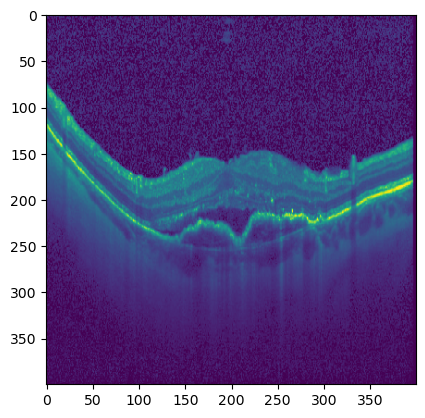

In [4]:
plt.imshow(simage.reshape(400, 400, 1))

In [5]:
test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(
                    PATH,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=4,
                    classes=['pseudodata'],
                    shuffle=False)

Found 247 images belonging to 1 classes.


In [6]:
probabilities = model.predict(test_data_gen).flatten()
probabilities.shape

 1/62 [..............................] - ETA: 9s

2024-02-16 14:51:08.590751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


62/62 [==============================] - 5s 85ms/step


(247,)

In [7]:
prob_new = [(i-probs)**2 for i in probabilities]
prob_new

[0.006953525115629466,
 0.022732673886313393,
 0.00046640168001715887,
 0.00046640168001715887,
 0.0005685215887238915,
 0.0005685215887238915,
 0.0016197907836085351,
 0.0016197907836085351,
 0.0008938384435733249,
 0.0008938384435733249,
 0.000558521483096111,
 0.000558521483096111,
 9.285076907894485e-07,
 0.001087853064846378,
 0.001087853064846378,
 0.0019271695997531563,
 0.0019271695997531563,
 0.002469442708319891,
 0.002469442708319891,
 0.00015465072977129124,
 0.00015465072977129124,
 0.001501113323936265,
 0.001501113323936265,
 9.285076907894485e-07,
 0.0025912682454266728,
 0.0025912682454266728,
 0.0014638944338760812,
 0.0014638944338760812,
 0.0009312218508007591,
 0.0009312218508007591,
 0.00020467361309256527,
 0.00048809562369905857,
 0.00048809562369905857,
 0.0077272204135031,
 0.0077272204135031,
 0.0003874983521461872,
 0.0003874983521461872,
 0.0005652079416071931,
 0.006953525115629466,
 0.0005652079416071931,
 0.0040777693008480775,
 0.0026802495584959396,
 0

In [8]:
def find(preb):
    ind = prob_new.index(preb)
    return ind

In [9]:
dirr = os.listdir(os.path.join(PATH, "pseudodata"))

In [10]:
trp = prob_new[:]
trp.sort()
torp = trp[0:3]
treep = []
for i in torp:
    treep.append(find(i))
treep
similar = [dirr[i] for i in treep]
similar
# plt.imshow(os.path.join(PATH, "pseudodata", similar[0]))

['CNV-53018-10.jpeg', 'CNV-53018-10.jpeg', 'CNV-81630-6.jpeg']

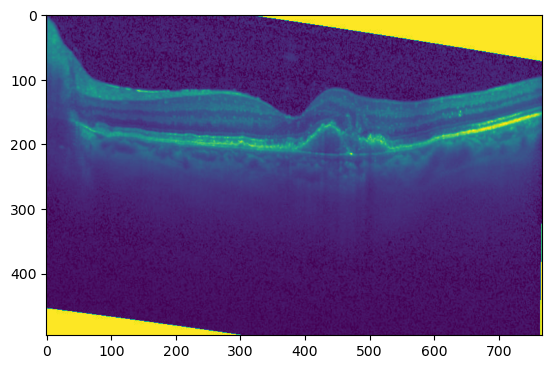

In [11]:
yup = os.path.join(PATH, "pseudodata", similar[0])
yup3 = os.path.join(PATH, "pseudodata", similar[2])
im = Image.open(yup)
im3 = Image.open(yup3)
plt.imshow(im)

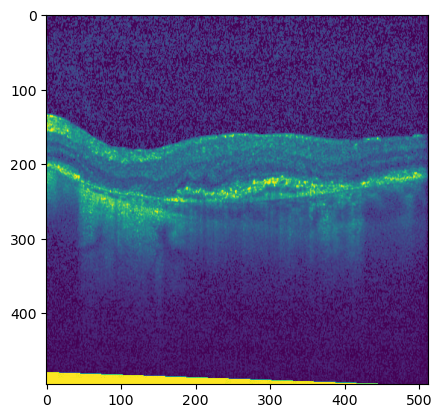

In [12]:
plt.imshow(im3)

In [13]:
from DeepImageSearch import Load_Data, Search_Setup

/Users/divyamkumar/anaconda3/envs/forget/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
dl = Load_Data()

image_list = dl.from_folder(["/Users/divyamkumar/Desktop/OCT-8/data/train/CNV"])
image_normal_list = dl.from_folder(["/Users/divyamkumar/Desktop/OCT-8/data/train/NORMAL"])


In [15]:
st = Search_Setup(image_list, model_name="vgg19", pretrained=True, image_count=None)
nl = Search_Setup(image_normal_list, model_name="vgg19", pretrained=True, image_count=None)

 Please Wait Model Is Loading or Downloading From Server!
 Model Loaded Successfully: vgg19
 Please Wait Model Is Loading or Downloading From Server!
 Model Loaded Successfully: vgg19


In [16]:
st.run_index()

 Metadata and Features are already present, Do you want Extract Again? Enter yes or no
 Meta data already Present, Please Apply Search!
['image_data_features.pkl', 'image_features_vectors.idx']


In [17]:
nl.run_index()

 Metadata and Features are already present, Do you want Extract Again? Enter yes or no
 Meta data already Present, Please Apply Search!
['image_data_features.pkl', 'image_features_vectors.idx']


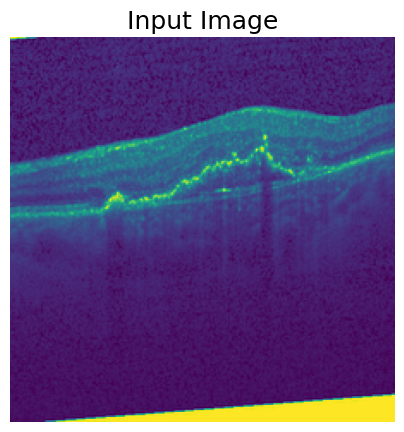

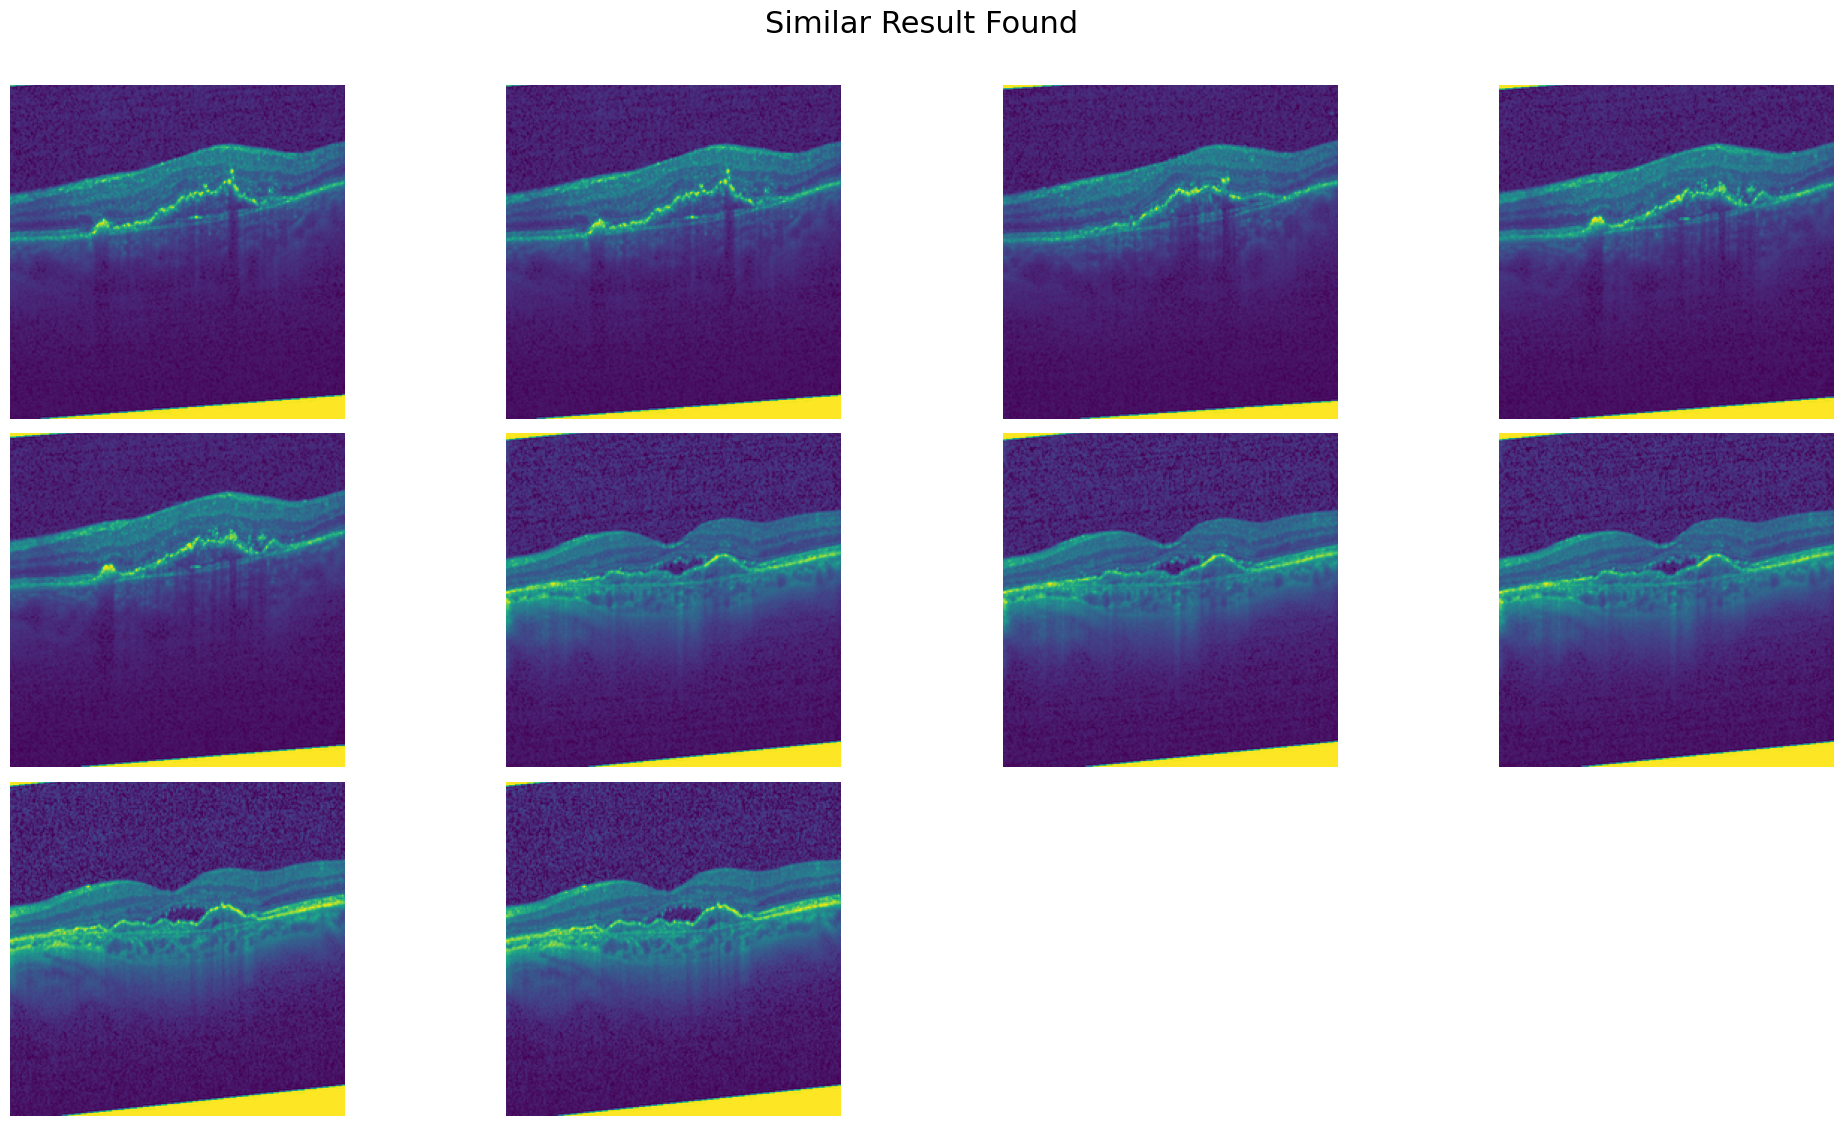

In [24]:
# from PIL import Image
# image = Image.fromarray(numpy_array)
# image.save('file name with extension(like .jpg)')
# t = simage.reshape(400, 400, 1)
# plt.imsave('file.jpg', t)
# plt.imshow(t)

st.plot_similar_images("/Users/divyamkumar/Desktop/OCT-8/data/test/CNV-172472-11.jpeg", number_of_images=10)

In [25]:
st.get_similar_images(image_path="/Users/divyamkumar/Desktop/OCT-8/data/test/CNV-172472-11.jpeg", number_of_images=10)

{6278: '/Users/divyamkumar/Desktop/OCT-8/data/train/CNV/CNV-172472-408.jpeg',
 7471: '/Users/divyamkumar/Desktop/OCT-8/data/train/CNV/CNV-172472-409.jpeg',
 1369: '/Users/divyamkumar/Desktop/OCT-8/data/train/CNV/CNV-172472-407.jpeg',
 637: '/Users/divyamkumar/Desktop/OCT-8/data/train/CNV/CNV-172472-410.jpeg',
 1294: '/Users/divyamkumar/Desktop/OCT-8/data/train/CNV/CNV-172472-411.jpeg',
 1995: '/Users/divyamkumar/Desktop/OCT-8/data/train/CNV/CNV-1112835-201.jpeg',
 4379: '/Users/divyamkumar/Desktop/OCT-8/data/train/CNV/CNV-1112835-203.jpeg',
 5416: '/Users/divyamkumar/Desktop/OCT-8/data/train/CNV/CNV-1112835-202.jpeg',
 3841: '/Users/divyamkumar/Desktop/OCT-8/data/train/CNV/CNV-1112835-200.jpeg',
 6245: '/Users/divyamkumar/Desktop/OCT-8/data/train/CNV/CNV-1112835-198.jpeg'}

In [30]:
im1 = tf.image.decode_image(tf.io.read_file('/Users/divyamkumar/Desktop/OCT-8/data/test/CNV-172472-11.jpeg'))
im2 = tf.image.decode_image(tf.io.read_file('/Users/divyamkumar/Desktop/OCT-8/data/train/CNV/CNV-172472-407.jpeg'))
tf.shape(im1)  # `img1.png` has 3 channels; shape is `(255, 255, 3)`
tf.shape(im2)  # `img2.png` has 3 channels; shape is `(255, 255, 3)`
    # Add an outer batch for each image.
im1 = tf.expand_dims(im1, axis=0)
im2 = tf.expand_dims(im2, axis=0)
    # Compute SSIM over tf.uint8 Tensors.
ssim1 = tf.image.ssim(im1, im2, max_val=255, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)
ssim2 = tf.image.ssim(im1, im2, max_val=255, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03, return_index_map=True)
ssim1
    # # Compute SSIM over tf.float32 Tensors.
    # im1 = tf.image.convert_image_dtype(im1, tf.float32)
    # im2 = tf.image.convert_image_dtype(im2, tf.float32)
    # ssim2 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
    #                       filter_sigma=1.5, k1=0.01, k2=0.03)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.47196952], dtype=float32)>

TypeError: Invalid shape (1, 486, 502) for image data

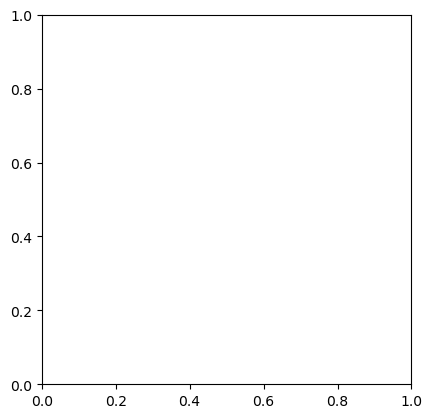

In [31]:
arr = np.ndarray((1,400,400,1))#This is your tensor
arr_ = np.squeeze(arr) # you can give axis attribute if you wanna squeeze in specific dimension
plt.imshow(arr_)
plt.show()
plt.imshow(ssim2)